In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('seattle-weather.csv')

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df.shape

(1461, 6)

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Year'] = df['date'].dt.year
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,Month,Day,Year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1,2,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,3,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1,4,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1,5,2012


In [6]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,Month,Day,Year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1,2,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,3,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1,4,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1,5,2012


In [7]:
df.describe()

,precipitation,temp_max,temp_min,wind,Month,Day,Year
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136,6.522930,15.729637,2013.498973
std,6.680194,7.349758,5.023004,1.437825,3.449884,8.803105,1.118723
min,0.000000,-1.600000,-7.100000,0.400000,1.000000,1.000000,2012.000000
25%,0.000000,10.600000,4.400000,2.200000,4.000000,8.000000,2012.000000
50%,0.000000,15.600000,8.300000,3.000000,7.000000,16.000000,2013.000000
75%,2.800000,22.200000,12.200000,4.000000,10.000000,23.000000,2014.000000
max,55.900000,35.600000,18.300000,9.500000,12.000000,31.000000,2015.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   Month          1461 non-null   int64         
 7   Day            1461 non-null   int64         
 8   Year           1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 102.9+ KB


In [9]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
Month            0
Day              0
Year             0
dtype: int64

In [10]:
print(f"Percent of Rain:    {(len(df[df.weather == 'rain'])/(len(df.weather))*100)} %")
print(f"Percent of Sun:     {(len(df[df.weather == 'sun'])/(len(df.weather))*100)} %")
print(f"Percent of Drizzle: {(len(df[df.weather == 'drizzle'])/(len(df.weather))*100)} %")
print(f"Percent of Snow:    {(len(df[df.weather == 'snow'])/(len(df.weather))*100)} %")
print(f"Percent of Fog:     {(len(df[df.weather == 'fog'])/(len(df.weather))*100)} %")

Percent of Rain:    43.87405886379192 %
Percent of Sun:     43.80561259411362 %
Percent of Drizzle: 3.6276522929500343 %
Percent of Snow:    1.7796030116358659 %
Percent of Fog:     6.913073237508556 %


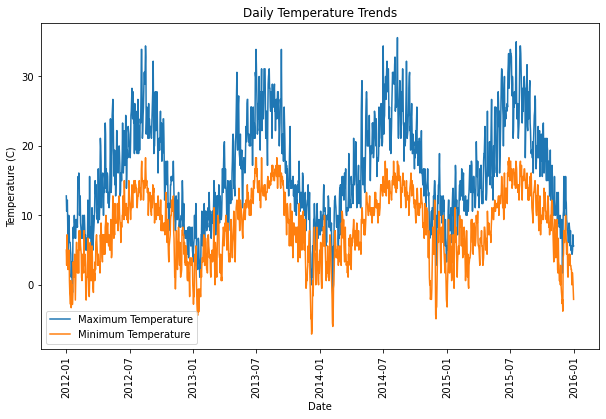

In [11]:
plt.figure(figsize=(10,6))
#Max/Min Temperature for the day
plt.plot(df['date'],df['temp_max'], label='Maximum Temperature')
plt.plot(df['date'],df['temp_min'], label='Minimum Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title("Daily Temperature Trends")
plt.legend()
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='weather', ylabel='count'>

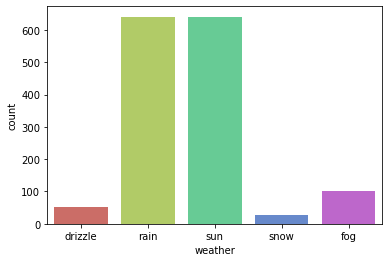

In [12]:
warnings.filterwarnings('ignore')
sns.countplot("weather",data=df,palette="hls")

<AxesSubplot:xlabel='wind', ylabel='Count'>

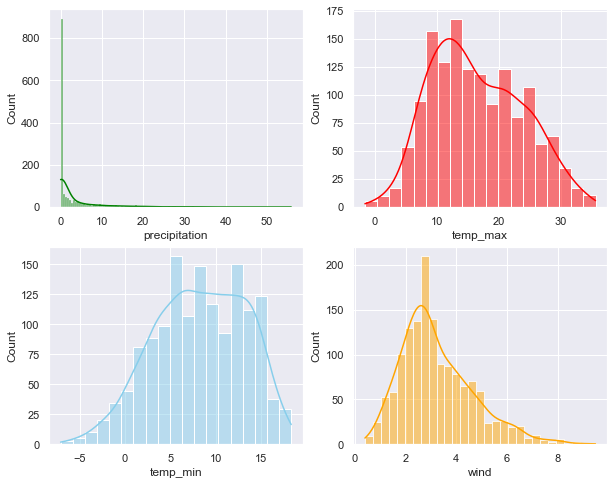

In [13]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

<AxesSubplot:>

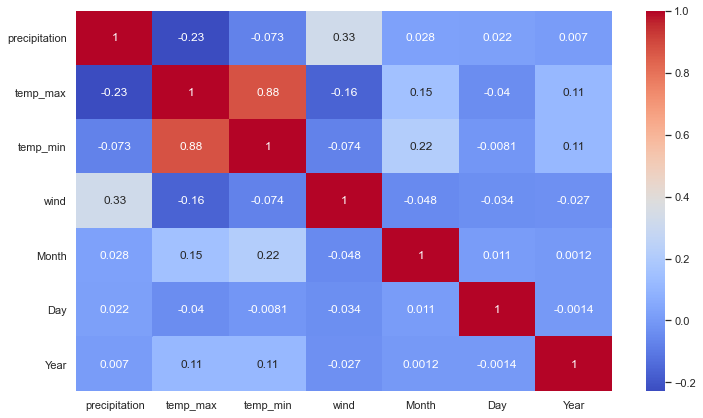

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Pearson correlation: -0.22855481643297043
T Test and P value: Ttest_indResult(statistic=-51.60685279531918, pvalue=0.0)


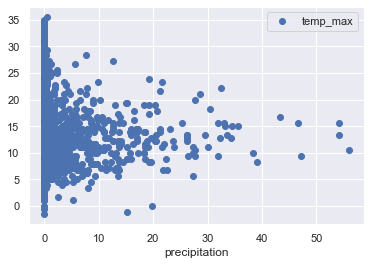

In [15]:
df.plot("precipitation","temp_max",style='o') 
print("Pearson correlation:",df["precipitation"].corr(df["temp_max"]))
print("T Test and P value:",stats.ttest_ind(df["precipitation"],df["temp_max"]))

Pearson correlation: -0.22855481643297043
T Test and P value: Ttest_indResult(statistic=-51.60685279531918, pvalue=0.0)


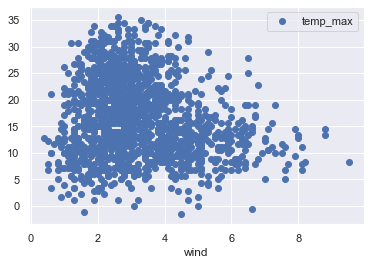

In [16]:
df.plot("wind","temp_max",style='o') 
print("Pearson correlation:",df["precipitation"].corr(df["temp_max"]))
print("T Test and P value:",stats.ttest_ind(df["precipitation"],df["temp_max"]))

Pearson correlation: -0.22855481643297043
T Test and P value: Ttest_indResult(statistic=-51.60685279531918, pvalue=0.0)


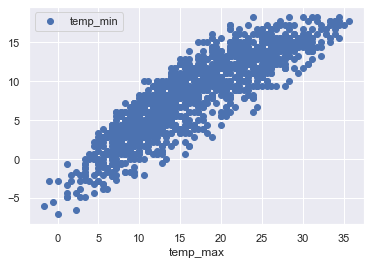

In [17]:
df.plot("temp_max","temp_min",style='o') 
print("Pearson correlation:",df["precipitation"].corr(df["temp_max"]))
print("T Test and P value:",stats.ttest_ind(df["precipitation"],df["temp_max"]))

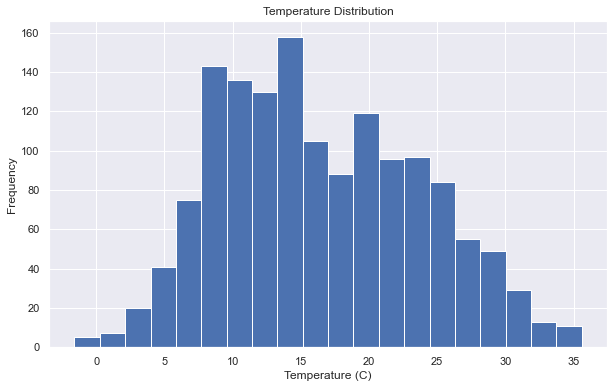

In [18]:
plt.figure(figsize=(10, 6))

# Plot a histogram of temperature
plt.hist(df['temp_max'], bins=20)
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')

plt.show()

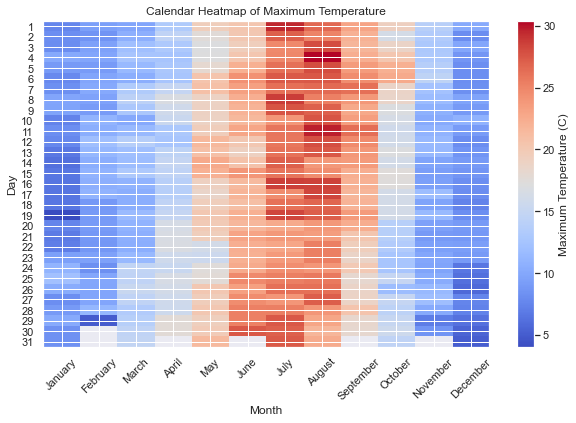

In [19]:
# Create a pivot table for the temperature values
pivot_table = df.pivot_table(values='temp_max', index='Day', columns='Month', aggfunc=np.mean)

# Create a calendar heatmap
plt.figure(figsize=(10, 6))
plt.imshow(pivot_table, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Maximum Temperature (C)')

# Set tick labels
months = calendar.month_name[1:13]
days = pivot_table.index
plt.xticks(np.arange(len(months)), months, rotation=45)
plt.yticks(np.arange(len(days)), days)

plt.xlabel('Month')
plt.ylabel('Day')
plt.title('Calendar Heatmap of Maximum Temperature')

plt.show()

In [20]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

In [21]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,Month,Day,Year
0,2012-01-01,0.0,12.8,5.0,4.7,0,1,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,2,1,2,2012
2,2012-01-03,0.8,11.7,7.2,2.3,2,1,3,2012
3,2012-01-04,20.3,12.2,5.6,4.7,2,1,4,2012
4,2012-01-05,1.3,8.9,2.8,6.1,2,1,5,2012


In [22]:
print(f"Percent of Drizzle: [0] {(len(df[df.weather == 0])/(len(df.weather))*100)} %")
print(f"Percent of Fog:     [1] {(len(df[df.weather == 1])/(len(df.weather))*100)} %")
print(f"Percent of Rain:    [2] {(len(df[df.weather == 2])/(len(df.weather))*100)} %")
print(f"Percent of Snow:    [3] {(len(df[df.weather == 3])/(len(df.weather))*100)} %")
print(f"Percent of sun:     [4] {(len(df[df.weather == 4])/(len(df.weather))*100)} %")

Percent of Drizzle: [0] 3.6276522929500343 %
Percent of Fog:     [1] 6.913073237508556 %
Percent of Rain:    [2] 43.87405886379192 %
Percent of Snow:    [3] 1.7796030116358659 %
Percent of sun:     [4] 43.80561259411362 %


In [23]:
target_month = int(input("Enter target month: "))

Enter target month: 11


In [24]:
if target_month == 1:
    m = 'January'
elif target_month == 2:
    m = 'February'
elif target_month == 3:
    m = 'March'
elif target_month == 4:
    m = 'April'
elif target_month == 5:
    m = 'May'
elif target_month == 6:
    m = 'June'
elif target_month == 7:
    m = 'July'
elif target_month == 8:
    m = 'August'
elif target_month == 9:
    m = 'Seotember'
elif target_month == 10:
    m = 'October'
elif target_month == 11:
    m = 'November'
elif target_month == 12:
    m = 'December'

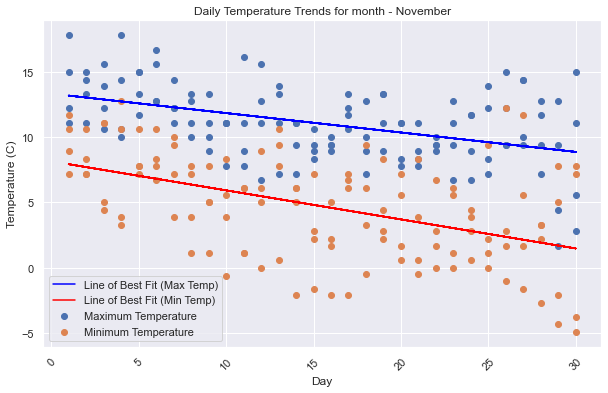

In [25]:
df_month = df[df['Month'] == target_month]

#daily temperature trends for the target month
plt.figure(figsize=(10, 6))
plt.scatter(df_month['Day'], df_month['temp_max'], label='Maximum Temperature')
plt.scatter(df_month['Day'], df_month['temp_min'], label='Minimum Temperature')

plt.xlabel('Day')
plt.ylabel('Temperature (C)')
plt.title(f'Daily Temperature Trends for month - {m}')
plt.legend()
plt.xticks(rotation=45)

# line of best fit for Maximum Temperature
m_max, b_max = np.polyfit(df_month['Day'], df_month['temp_max'], 1)
plt.plot(df_month['Day'], m_max * df_month['Day'] + b_max, color='blue', label='Line of Best Fit (Max Temp)')

# line of best fit for Minimum Temperature
m_min, b_min = np.polyfit(df_month['Day'], df_month['temp_min'], 1)
plt.plot(df_month['Day'], m_min * df_month['Day'] + b_min, color='red', label='Line of Best Fit (Min Temp)')

plt.legend()
plt.show()

In [26]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'Month', 'Day', 'Year'],
      dtype='object')

In [27]:
df.weather.unique()

array([0, 2, 4, 3, 1])

In [28]:
y = df['weather']

In [29]:
X = df.copy()

In [30]:
X.drop(['date','weather','Month', 'Day', 'Year'], axis=1, inplace=True)

In [31]:
X

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [32]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int32

In [33]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,Month,Day,Year
0,2012-01-01,0.0,12.8,5.0,4.7,0,1,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,2,1,2,2012
2,2012-01-03,0.8,11.7,7.2,2.3,2,1,3,2012
3,2012-01-04,20.3,12.2,5.6,4.7,2,1,4,2012
4,2012-01-05,1.3,8.9,2.8,6.1,2,1,5,2012


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(X_test,y_test)*100))

KNN Accuracy:76.81%


In [36]:
input=[[40,32,27,6]]
ot = knn.predict(input)
print("The weather is:",end = " ")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is: Rain


In [37]:
input=[[1.140175,8.9,2.8,2.469818]]
ot = knn.predict(input)
print("The weather is:",end = " ")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is: Rain


In [38]:
input=[[0,17,10,11]]
ot = knn.predict(input)
print("The weather is:",end = " ")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is: Rain


In [43]:
input=[[0,-10,-24,11]]
ot = knn.predict(input)
print("The weather is:",end = " ")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is: Sun
